## Dalitz Plot 

Refer [here](https://en.wikipedia.org/wiki/Dalitz_plot) for Dalitz Plot.

Here we focus on a three body decay like :
\begin{equation}
A(m) \rightarrow 1(m_1)+2(m_2)+3(m_3)
\end{equation}

The plot is computed for the following three body decay :

\begin{equation*}

\eta \rightarrow \pi^{+} + \pi^{0} + \pi^{-}.
\end{equation*}

The masses of the particles involved are :

\begin{align*} 
m_{\eta} &= 547.862\text{ MeV} \\
m_{\pi^{+}} &= 139.57039\text{ MeV} \\
m_{\pi^{-}} &= 139.57039\text{ MeV} \\
m_{\pi^{0}} &= 134.9768\text{ MeV} \\

\end{align*}



## Equations involved

We consider the centre of mass frame of particles 1 and 2. In this frame,
\begin{align}
E_2^c &= \frac{m_{12}^2+m_2^2-m_1^2}{2 m_{12}} \\
E_3^c &= \frac{m^2-m_{12}^2-m_3^2}{2 m_{12}}  \\
\vec{p_1} &= -\vec{p_2} \\
|\vec{p_1}| &= |\vec{p_2}| = p = \sqrt{(E_1^c)^2 - m_1^2} \\
\cos(\theta) &= \frac{m_2^2+m_3^2+2 E_2^c E_3^c-m_{23}^2}{2 p^2}.
\end{align}
When $|\cos(\theta)|\leq 1$, then we accept $m_{12}$ and $m_{23}$.

Ranges of $m_{12}$, $m_{23}$ and $m_{31}$ :
\begin{align*}
(m_1 + m_2)^2 &\leq m_{12}^2 \leq (m-m_3)^2 \\
(m_2 + m_3)^2 &\leq m_{23}^2 \leq (m-m_1)^2 \\
(m_3 + m_1)^2 &\leq m_{31}^2 \leq (m-m_2)^2 \\
\end{align*}


In [118]:
# Importing the required modules
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from tqdm import tqdm
plt.style.use(["science","no-latex"])

In [119]:
# Masses in MeV
m = 547.862
m1 = 139.57039
m2 = 139.57039
m3 = 134.9768

In [120]:
# Energy and momentum
E2c = lambda m12 : (m12**2 + m2**2 - m1**2)/(2*m12)
E3c = lambda m12 : (m**2 - m12**2 -m3**2)/(2*m12)
p2c = lambda m12 : E2c(m12)**2 - m2**2
p3c = lambda m12 : E3c(m12)**2 - m3**2

In [121]:
# Angle between 2 and 3 in COM frame of 1 and 2 particles.
def m23_2(m12) : 
    return np.where(p2c(m12)>=0,np.where(p3c(m12)>=0,m2**2 + m3**2 + 2*(E2c(m12)*E3c(m12) - 2*p2c(m12)**0.5 * p3c*(m12)**0.5),-np.inf),-np.inf)

def cos_theta(m12,m23) : 
    return np.where(p2c(m12)>=0,np.where(p3c(m12)>=0,(m2**2 + m3**2 + 2*(E2c(m12)*E3c(m12)) - m23**2)/(2*p2c(m12)**0.5 *p3c(m12)**0.5),-np.inf),-np.inf)



In [122]:
# Ranges of m12 and m23
m12_min = (m1+m2)
m12_max = m-m3

m23_min = (m2+m3)
m23_max = m-m1

print("m12 minimum is",m12_min,r"and maximum is",m12_max)
print("m23 minimum is",m23_min,r"and maximum is",m23_max)

m12 minimum is 279.14078 and maximum is 412.88519999999994
m23 minimum is 274.54719 and maximum is 408.29161


In [123]:
num = 1000 # The number of points for m12 and m23 array

# Arrays for m12 and m23
m12_arr = np.linspace(100,500,num)
m23_arr = np.linspace(100,500,num)
output = np.empty((num,num))

# @jit
def output_func(m12_arr,m23_arr,output):
    for i in tqdm(range(num)):
        for j in range(num):
            if np.abs(cos_theta(m12_arr[i],m23_arr[j]))<=1:
                output[i][j] = 1
            else:
                output[i][j] = 0
    return output

output = output_func(m12_arr,m23_arr,output)

  0%|          | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_14792/3335872434.py:6: RuntimeWarning: invalid value encountered in scalar power
  return np.where(p2c(m12)>=0,np.where(p3c(m12)>=0,(m2**2 + m3**2 + 2*(E2c(m12)*E3c(m12)) - m23**2)/(2*p2c(m12)**0.5 *p3c(m12)**0.5),-np.inf),-np.inf)
100%|██████████| 1000/1000 [00:09<00:00, 109.81it/s]


In [124]:
output

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1000, 1000))

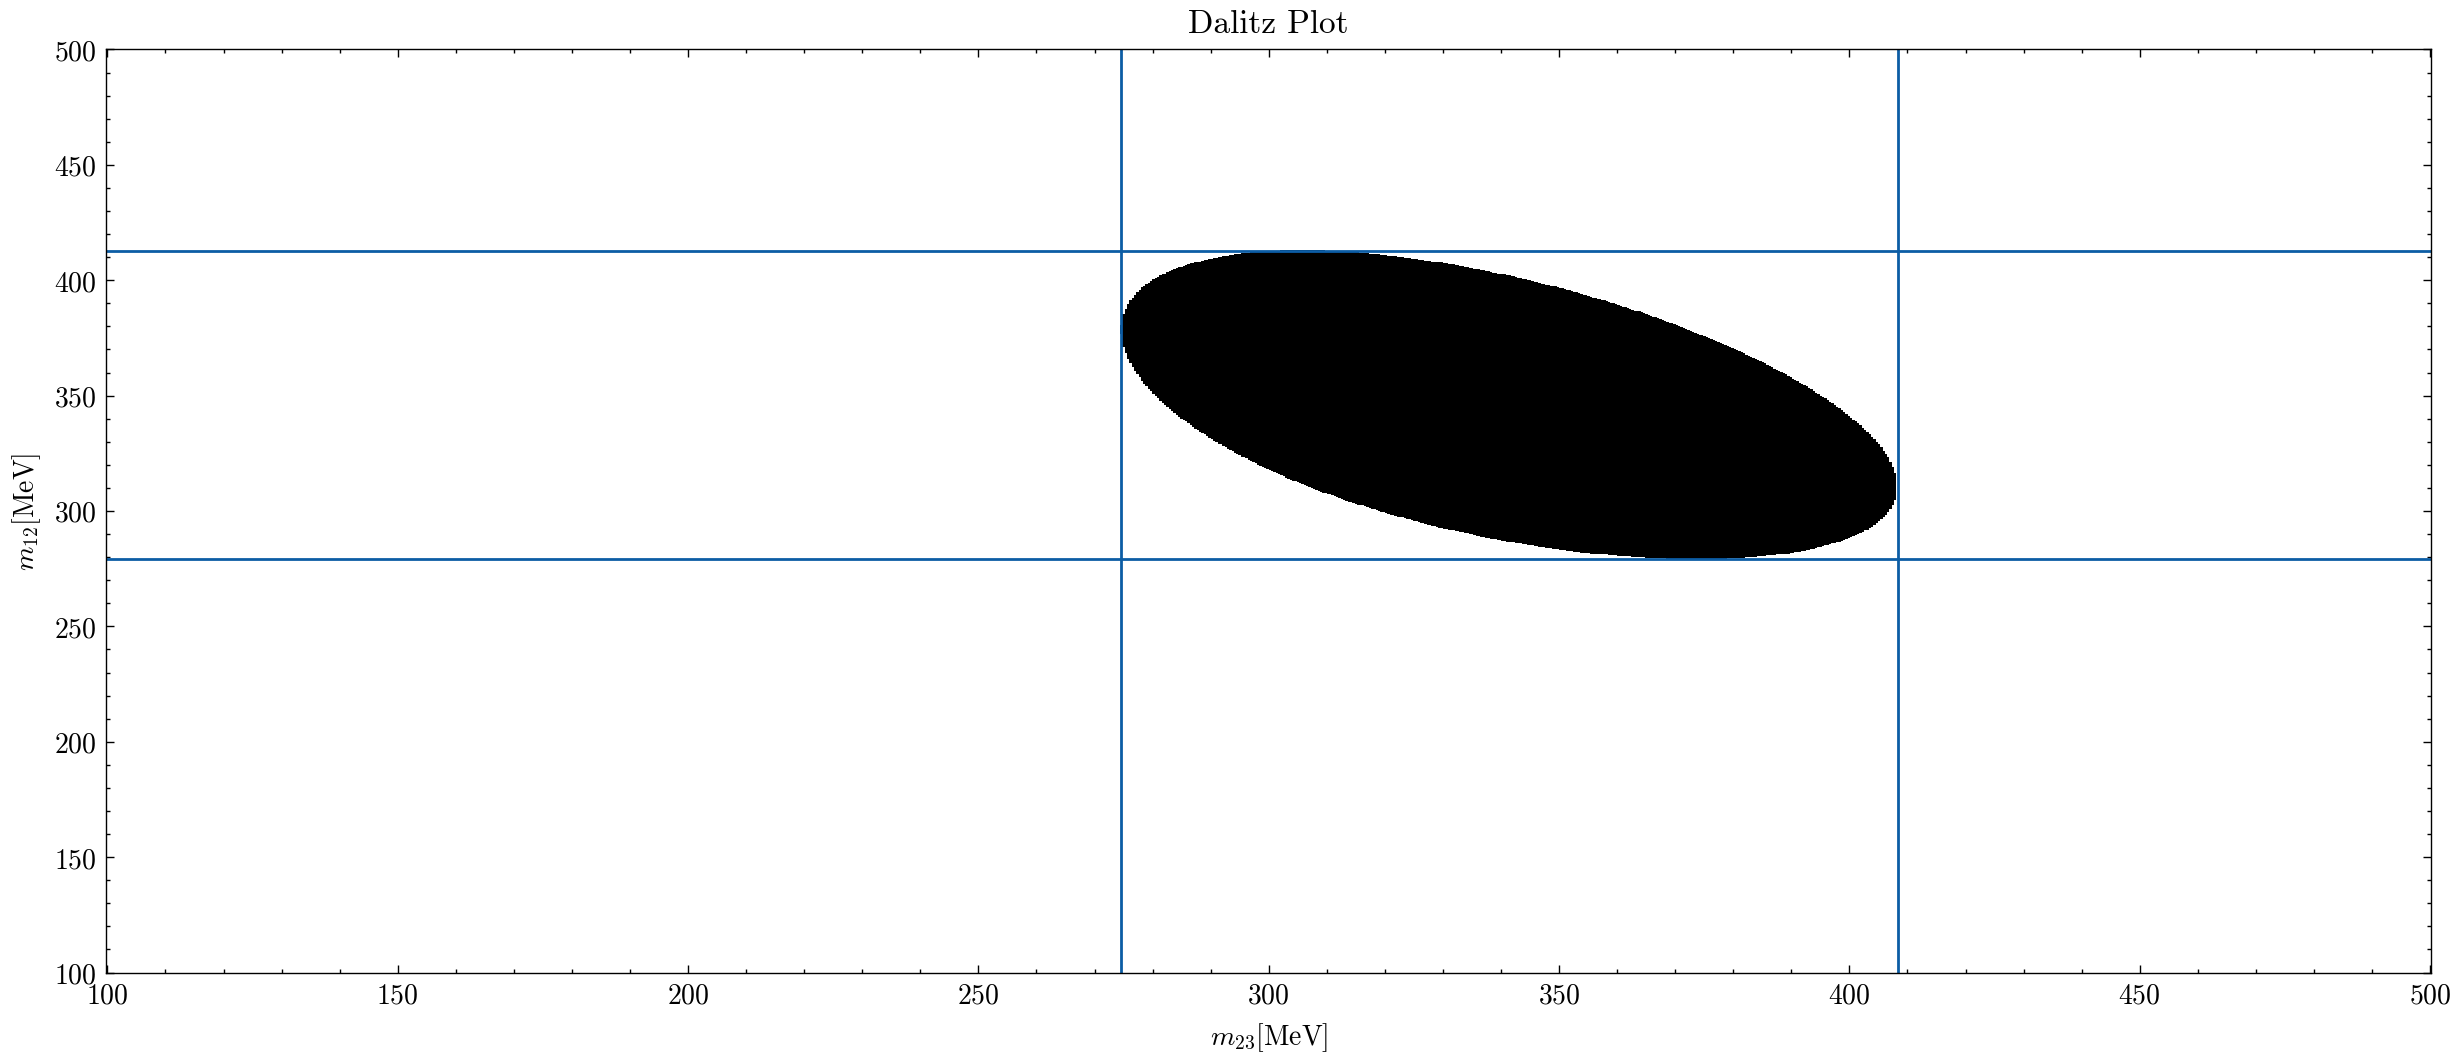

In [137]:
plt.figure(figsize=(15,6),dpi=200)
plt.pcolormesh(m12_arr,m23_arr,output,shading="nearest",cmap='Greys')
plt.xlabel(r"$m_{23}$[MeV]")
plt.ylabel(r"$m_{12}$[MeV]")
plt.axvline(m23_min)
plt.axvline(m23_max)
plt.axhline(m12_min)
plt.axhline(m12_max)
plt.title("Dalitz Plot")
plt.savefig("Dalitz plot")
plt.show()